In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv(r'F:\DS\Time_Series_Analysis\[ FreeCourseWeb.com ] Udemy - Python for Time Series Data Analysis\01. Introduction\UDEMY_TSA_FINAL\Data\uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [2]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


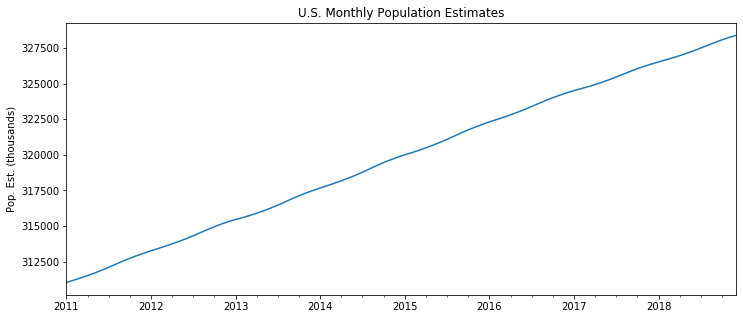

In [3]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [4]:
len(df)

96

In [5]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

# Fit_AR_Model

In [6]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        151.119654
L1.PopEst      0.999526
dtype: float64


In [8]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [9]:
predictions1

2018-01-01    326374.375071
2018-02-01    326370.751860
2018-03-01    326367.130367
2018-04-01    326363.510591
2018-05-01    326359.892532
2018-06-01    326356.276188
2018-07-01    326352.661558
2018-08-01    326349.048642
2018-09-01    326345.437440
2018-10-01    326341.827949
2018-11-01    326338.220170
2018-12-01    326334.614101
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [10]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326374.3751, expected=326527
predicted=326370.7519, expected=326669
predicted=326367.1304, expected=326812
predicted=326363.5106, expected=326968
predicted=326359.8925, expected=327134
predicted=326356.2762, expected=327312
predicted=326352.6616, expected=327502
predicted=326349.0486, expected=327698
predicted=326345.4374, expected=327893
predicted=326341.8279, expected=328077
predicted=326338.2202, expected=328241
predicted=326334.6141, expected=328393


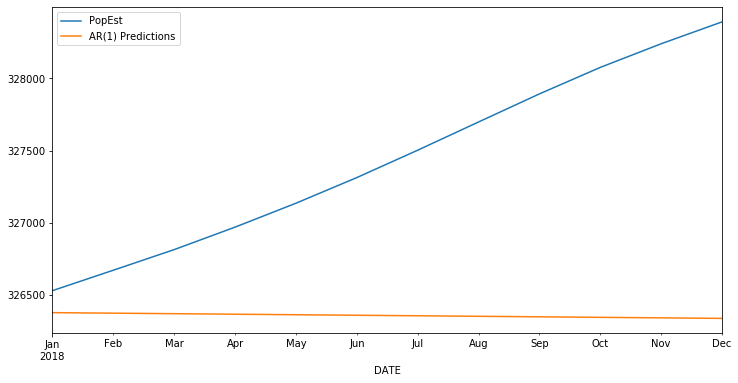

In [11]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

# Fit_AR2_Model

In [12]:
# Recall that our model was already created above based on the training set
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.361495
L1.PopEst      1.996471
L2.PopEst     -0.996902
dtype: float64


In [13]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

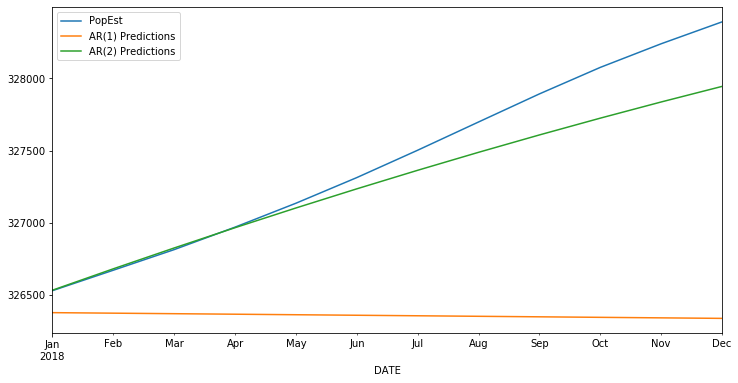

In [14]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

# Run_AR_Model_Where_StatModel_Choose_(P)_Value

In [15]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.171107
L1.PopEst      2.334114
L2.PopEst     -2.231174
L3.PopEst      1.697091
L4.PopEst     -1.394967
L5.PopEst      0.994557
L6.PopEst     -1.001419
L7.PopEst      0.954663
L8.PopEst     -0.360698
L9.PopEst      0.127919
L10.PopEst    -0.027856
L11.PopEst    -0.092531
dtype: float64


In [16]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

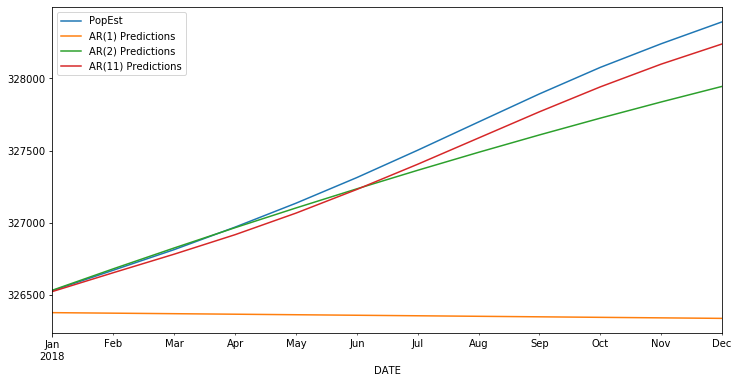

In [17]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

# Evaluate_The_Model

In [18]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1549346.439
AR(2) Error: 53375.84955
AR(11) Error: 9561.483442


In [19]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 3.3645
AR(2) AIC: 3.3883
AR(11) AIC: 3.6026


# Forecasting

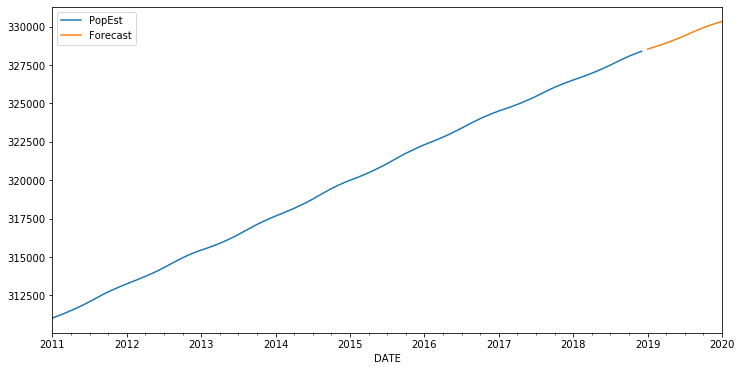

In [20]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));